In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
pd.set_option('display.max_columns', None)


## Data with only features

In [3]:
kd_all = pd.read_csv('data/kepler_data_cumulative.csv')

In [4]:
kd_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9564 non-null   int64  
 1   koi_name              9564 non-null   object 
 2   kepler_name           2360 non-null   object 
 3   planet_status         9564 non-null   object 
 4   data_disposition      9564 non-null   object 
 5   koi_score             8054 non-null   float64
 6   not_transit_flag      9564 non-null   int64  
 7   stellar_eclipse_flag  9564 non-null   int64  
 8   centroid_offset_flag  9564 non-null   int64  
 9   emic_flag             9564 non-null   int64  
 10  period                9564 non-null   float64
 11  transit_epoch         9564 non-null   float64
 12  impact_parameter      9201 non-null   float64
 13  transit_duration      9564 non-null   float64
 14  transit_depth         9201 non-null   float64
 15  radius               

In [5]:
kd_all['data_disposition'].value_counts()

FALSE POSITIVE    4847
CANDIDATE         4717
Name: data_disposition, dtype: int64

Roughly even counts of the classes, thats good

In [6]:
kd_all[kd_all['impact_parameter'].isna()]

id   koi_name kepler_name   planet_status data_disposition  \
330   6209637  K01046.01         NaN  FALSE POSITIVE   FALSE POSITIVE   
360   3235672  K01109.01         NaN  FALSE POSITIVE   FALSE POSITIVE   
479   3447722  K01198.04         NaN       CANDIDATE        CANDIDATE   
493   8414907  K01134.02         NaN  FALSE POSITIVE   FALSE POSITIVE   
495   8386035  K01136.01         NaN  FALSE POSITIVE   FALSE POSITIVE   
...       ...        ...         ...             ...              ...   
9348  9142714  K07928.01         NaN       CANDIDATE        CANDIDATE   
9393  8527297  K08157.01         NaN       CANDIDATE        CANDIDATE   
9406  9588880  K07946.01         NaN  FALSE POSITIVE   FALSE POSITIVE   
9501  9216810  K08179.01         NaN  FALSE POSITIVE   FALSE POSITIVE   
9517  9899345  K07973.01         NaN       CANDIDATE        CANDIDATE   

      koi_score  not_transit_flag  stellar_eclipse_flag  centroid_offset_flag  \
330         NaN                 0                     0                     0   
360         NaN                 1                     0                     0   
479         NaN                 0                     0                     0   
493       0.000                 1                     0                     1   
495       0.000                 1                     0                     1   
...         ...               ...                   ...                   ...   
9348      1.000                 0                     0                     0   
9393      0.638                 0                     0                     0   
9406      0.235                 1                     0                     0   
9501      0.207                 1                     0                     0   
9517      0.000                 0                     0                     0   

      emic_flag  ...  insol_flux  signal_to_noise  TCE_num     TCE_delivery  \
330           0  ...         NaN              NaN      NaN              NaN   
360           0  ...         NaN              NaN      NaN              NaN   
479           0  ...         NaN              NaN      NaN              NaN   
493           1  ...         NaN              NaN      2.0  q1_q17_dr25_tce   
495           1  ...     17098.4              NaN      1.0  q1_q17_dr25_tce   
...         ...  ...         ...              ...      ...              ...   
9348          0  ...         NaN              NaN      4.0  q1_q17_dr25_tce   
9393          0  ...         NaN              NaN      3.0  q1_q17_dr25_tce   
9406          0  ...         NaN              NaN      7.0  q1_q17_dr25_tce   
9501          0  ...         NaN              NaN      2.0  q1_q17_dr25_tce   
9517          0  ...         NaN              NaN      1.0  q1_q17_dr25_tce   

      stellar_eff_temp  stellar_surf_grav  stellar_radius         ra  \
330                NaN                NaN             NaN  293.28799   
360                NaN                NaN             NaN  291.60690   
479                NaN                NaN             NaN  292.47971   
493                NaN                NaN             NaN  284.51962   
495                NaN                NaN             NaN  298.21188   
...                ...                ...             ...        ...   
9348               NaN                NaN             NaN  286.04276   
9393               NaN                NaN             NaN  301.66180   
9406               NaN                NaN             NaN  292.16595   
9501               NaN                NaN             NaN  291.26102   
9517               NaN                NaN             NaN  295.20798   

            dec  kepler_band  
330   41.560455       13.220  
360   38.348061       14.792  
479   38.514919       15.319  
493   44.453941       15.783  
495   44.324638       12.647  
...         ...          ...  
9348  45.511211       15.375  
9393  44.577499       14.010  
9406  46.227631       14.703  
9501  45.637470       10.555  
9517  

In [7]:
kd_all[kd_all['transit_depth'].isna()]

id   koi_name kepler_name   planet_status data_disposition  \
330   6209637  K01046.01         NaN  FALSE POSITIVE   FALSE POSITIVE   
360   3235672  K01109.01         NaN  FALSE POSITIVE   FALSE POSITIVE   
479   3447722  K01198.04         NaN       CANDIDATE        CANDIDATE   
493   8414907  K01134.02         NaN  FALSE POSITIVE   FALSE POSITIVE   
495   8386035  K01136.01         NaN  FALSE POSITIVE   FALSE POSITIVE   
...       ...        ...         ...             ...              ...   
9348  9142714  K07928.01         NaN       CANDIDATE        CANDIDATE   
9393  8527297  K08157.01         NaN       CANDIDATE        CANDIDATE   
9406  9588880  K07946.01         NaN  FALSE POSITIVE   FALSE POSITIVE   
9501  9216810  K08179.01         NaN  FALSE POSITIVE   FALSE POSITIVE   
9517  9899345  K07973.01         NaN       CANDIDATE        CANDIDATE   

      koi_score  not_transit_flag  stellar_eclipse_flag  centroid_offset_flag  \
330         NaN                 0                     0                     0   
360         NaN                 1                     0                     0   
479         NaN                 0                     0                     0   
493       0.000                 1                     0                     1   
495       0.000                 1                     0                     1   
...         ...               ...                   ...                   ...   
9348      1.000                 0                     0                     0   
9393      0.638                 0                     0                     0   
9406      0.235                 1                     0                     0   
9501      0.207                 1                     0                     0   
9517      0.000                 0                     0                     0   

      emic_flag  ...  insol_flux  signal_to_noise  TCE_num     TCE_delivery  \
330           0  ...         NaN              NaN      NaN              NaN   
360           0  ...         NaN              NaN      NaN              NaN   
479           0  ...         NaN              NaN      NaN              NaN   
493           1  ...         NaN              NaN      2.0  q1_q17_dr25_tce   
495           1  ...     17098.4              NaN      1.0  q1_q17_dr25_tce   
...         ...  ...         ...              ...      ...              ...   
9348          0  ...         NaN              NaN      4.0  q1_q17_dr25_tce   
9393          0  ...         NaN              NaN      3.0  q1_q17_dr25_tce   
9406          0  ...         NaN              NaN      7.0  q1_q17_dr25_tce   
9501          0  ...         NaN              NaN      2.0  q1_q17_dr25_tce   
9517          0  ...         NaN              NaN      1.0  q1_q17_dr25_tce   

      stellar_eff_temp  stellar_surf_grav  stellar_radius         ra  \
330                NaN                NaN             NaN  293.28799   
360                NaN                NaN             NaN  291.60690   
479                NaN                NaN             NaN  292.47971   
493                NaN                NaN             NaN  284.51962   
495                NaN                NaN             NaN  298.21188   
...                ...                ...             ...        ...   
9348               NaN                NaN             NaN  286.04276   
9393               NaN                NaN             NaN  301.66180   
9406               NaN                NaN             NaN  292.16595   
9501               NaN                NaN             NaN  291.26102   
9517               NaN                NaN             NaN  295.20798   

            dec  kepler_band  
330   41.560455       13.220  
360   38.348061       14.792  
479   38.514919       15.319  
493   44.453941       15.783  
495   44.324638       12.647  
...         ...          ...  
9348  45.511211       15.375  
9393  44.577499       14.010  
9406  46.227631       14.703  
9501  45.637470       10.555  
9517  

In [8]:
kd_nonan = kd_all.dropna(axis=0, subset = ['impact_parameter', 'transit_depth','kepler_band'])

In [9]:
kd_nonan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9200 entries, 0 to 9563
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9200 non-null   int64  
 1   koi_name              9200 non-null   object 
 2   kepler_name           2359 non-null   object 
 3   planet_status         9200 non-null   object 
 4   data_disposition      9200 non-null   object 
 5   koi_score             7994 non-null   float64
 6   not_transit_flag      9200 non-null   int64  
 7   stellar_eclipse_flag  9200 non-null   int64  
 8   centroid_offset_flag  9200 non-null   int64  
 9   emic_flag             9200 non-null   int64  
 10  period                9200 non-null   float64
 11  transit_epoch         9200 non-null   float64
 12  impact_parameter      9200 non-null   float64
 13  transit_duration      9200 non-null   float64
 14  transit_depth         9200 non-null   float64
 15  radius               

In [10]:
kd_clean = kd_nonan.drop(columns=['TCE_num','TCE_delivery' ])
kd_clean.drop(342,inplace=True)
kd_clean.reset_index(drop=True, inplace=True)

In [11]:
kd_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9199 entries, 0 to 9198
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9199 non-null   int64  
 1   koi_name              9199 non-null   object 
 2   kepler_name           2359 non-null   object 
 3   planet_status         9199 non-null   object 
 4   data_disposition      9199 non-null   object 
 5   koi_score             7994 non-null   float64
 6   not_transit_flag      9199 non-null   int64  
 7   stellar_eclipse_flag  9199 non-null   int64  
 8   centroid_offset_flag  9199 non-null   int64  
 9   emic_flag             9199 non-null   int64  
 10  period                9199 non-null   float64
 11  transit_epoch         9199 non-null   float64
 12  impact_parameter      9199 non-null   float64
 13  transit_duration      9199 non-null   float64
 14  transit_depth         9199 non-null   float64
 15  radius               

In [12]:
@interact
def widget(col=kd_clean.columns):
    return kd_clean[col].value_counts()

interactive(children=(Dropdown(description='col', options=('id', 'koi_name', 'kepler_name', 'planet_status', '…

After cleaning it looks like theres a fairly even mix of candidates and false positives, which makes things easier

In [13]:
features = ['data_disposition', 'period', 'transit_epoch', 'impact_parameter', 'transit_duration',
           'transit_depth', 'radius','eq_temp','insol_flux', 'signal_to_noise', 'stellar_eff_temp',
           'stellar_surf_grav', 'stellar_radius', 'ra', 'dec', 'kepler_band']

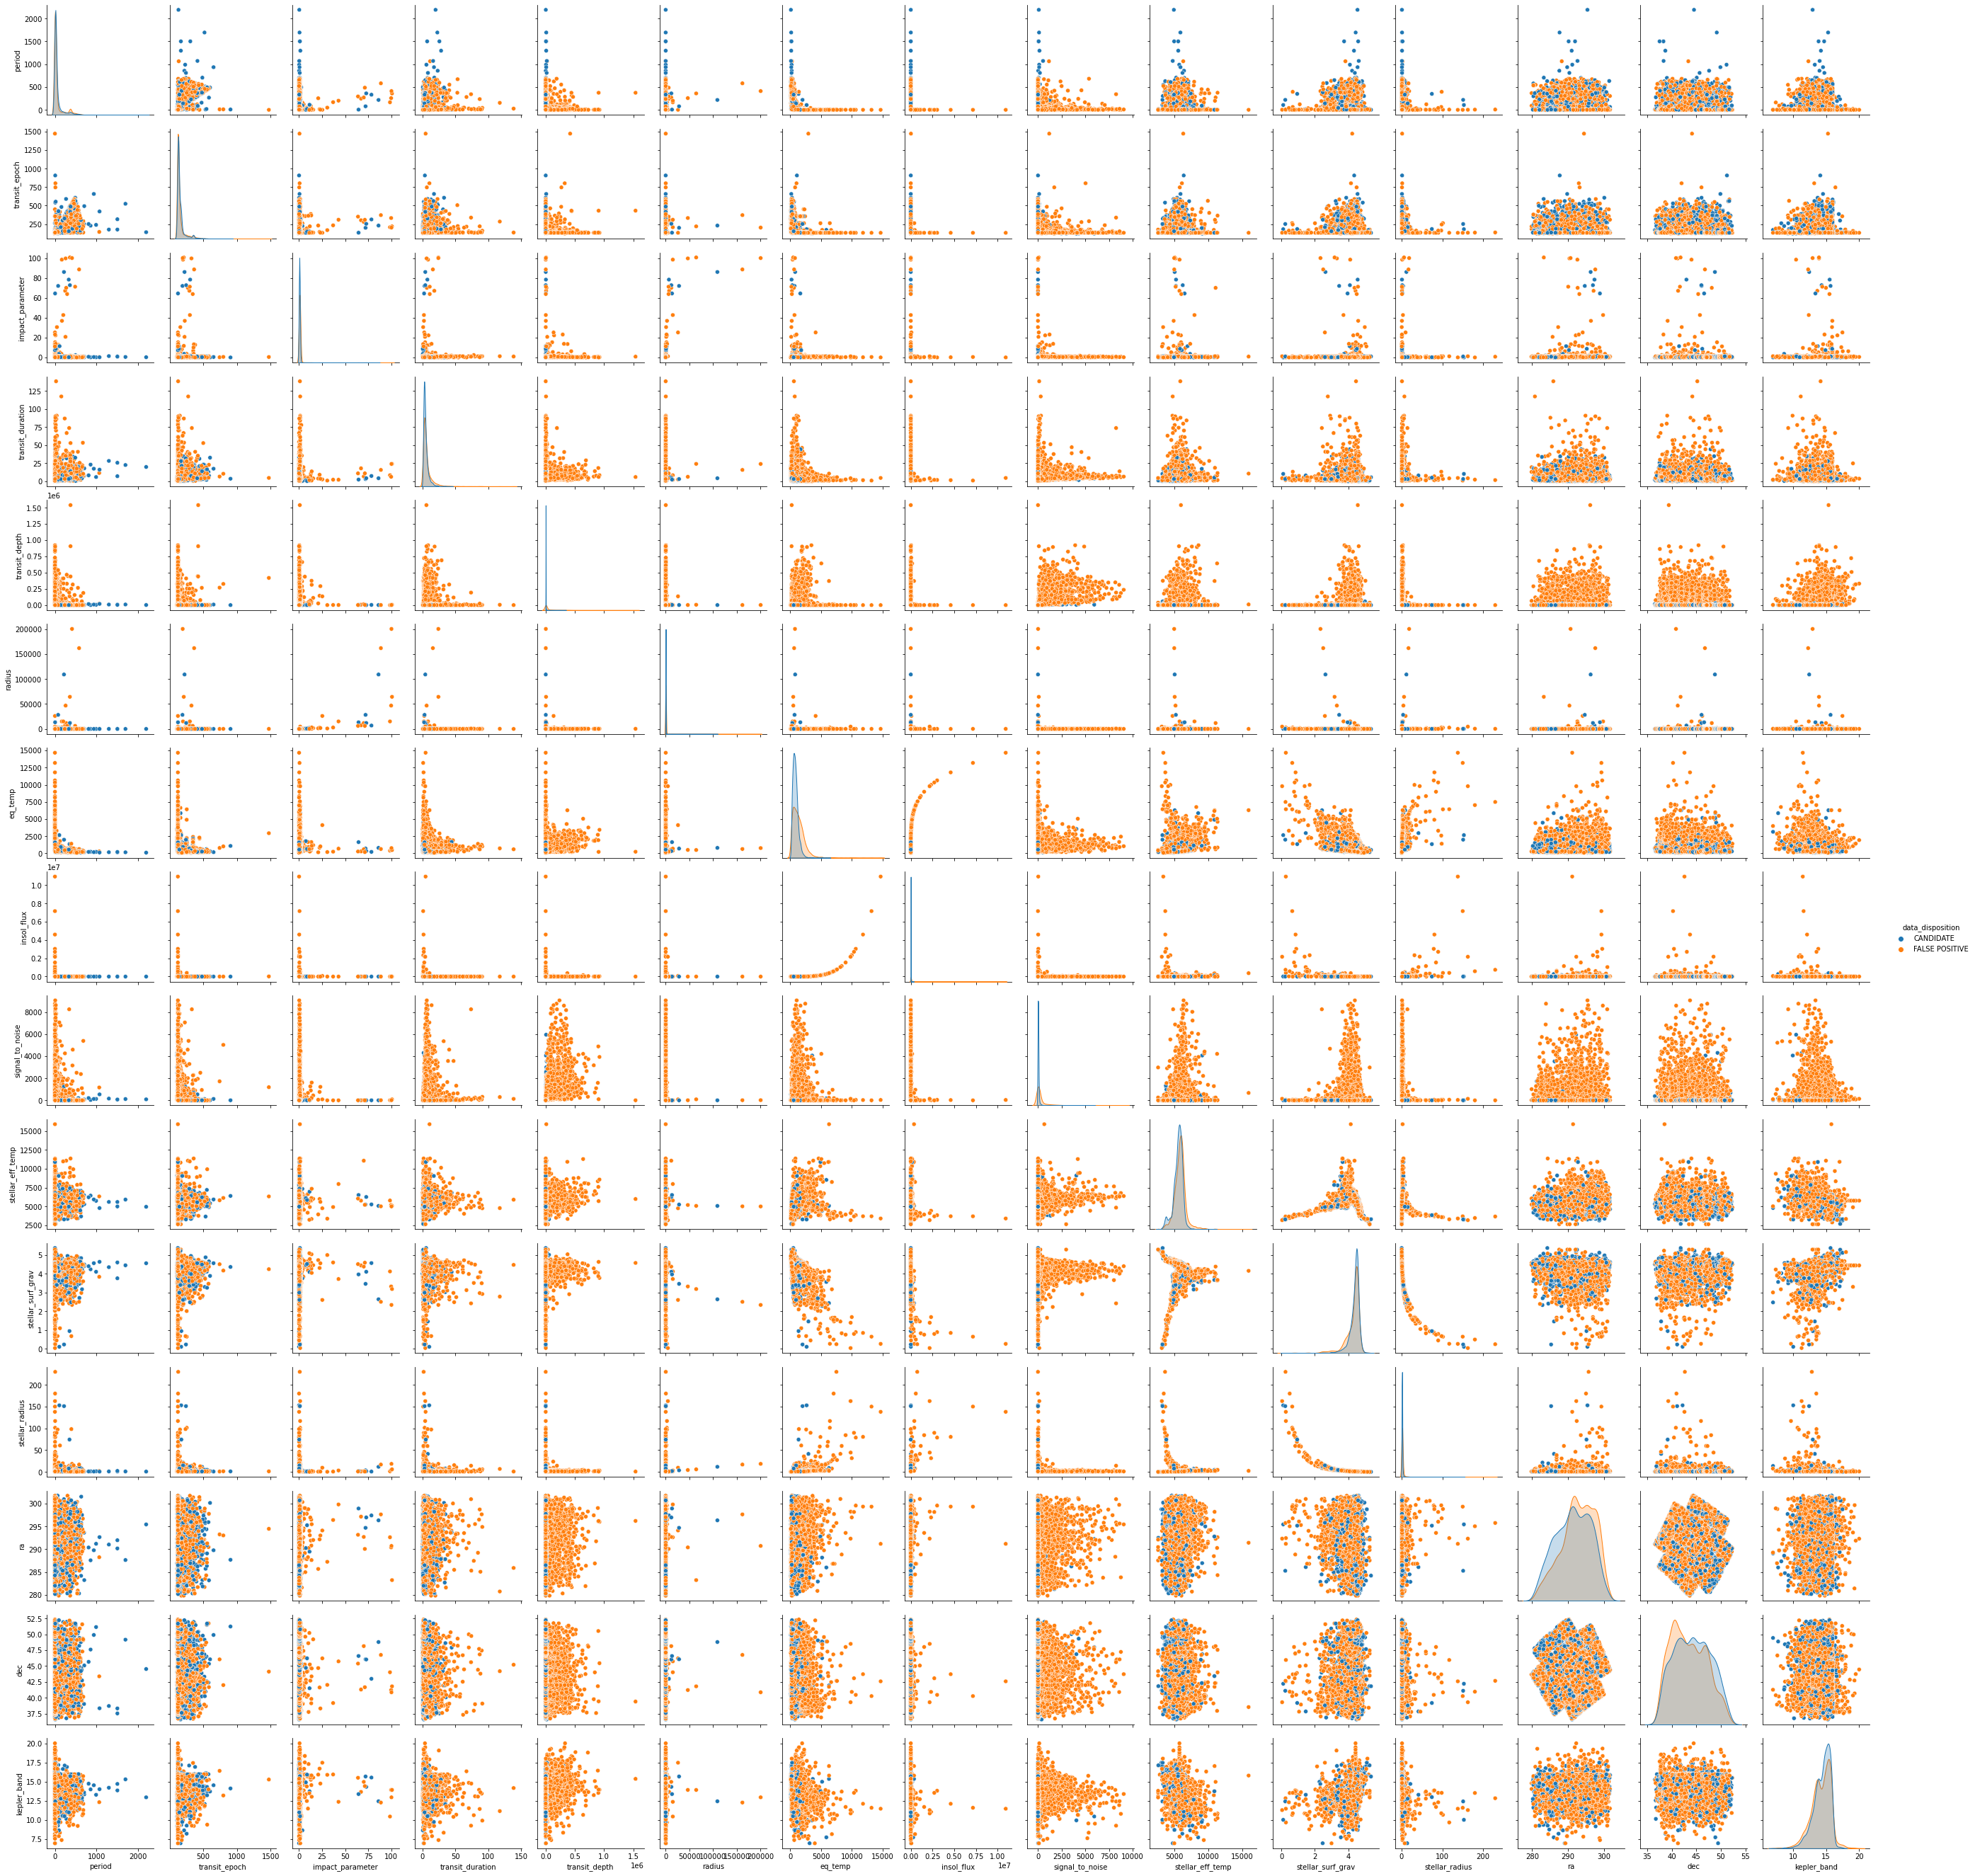

In [51]:
sns.pairplot(kd_clean[features], hue = 'data_disposition')

In [14]:
@interact_manual
def plot_features(x=features, y=features,):
    if x!=y:
        sns.scatterplot(data=kd_clean, x=x, y=y, hue='data_disposition')
    if x==y:
        sns.kdeplot(data=kd_clean, x=x, hue='data_disposition')

interactive(children=(Dropdown(description='x', options=('data_disposition', 'period', 'transit_epoch', 'impac…

In [69]:
kd_clean['disposition_num'] = kd_clean['data_disposition'].map({'CANDIDATE':1, 'FALSE POSITIVE':0})

In [73]:
print(kd_clean.disposition_num.value_counts())
print(kd_clean.data_disposition.value_counts())

1    4611
0    4588
Name: disposition_num, dtype: int64
CANDIDATE         4611
FALSE POSITIVE    4588
Name: data_disposition, dtype: int64


In [74]:
kd_clean.to_csv('data/cleaned_data.csv')

## Data with error

In [42]:
kd_all_err = pd.read_csv('data/kepler_data_with_err.csv', index_col=0)

In [43]:
kd_all_err

id   koi_name   kepler_name   planet_status data_disposition  \
rowid                                                                       
1      10797460  K00752.01  Kepler-227 b       CONFIRMED        CANDIDATE   
2      10797460  K00752.02  Kepler-227 c       CONFIRMED        CANDIDATE   
3      10811496  K00753.01           NaN       CANDIDATE        CANDIDATE   
4      10848459  K00754.01           NaN  FALSE POSITIVE   FALSE POSITIVE   
5      10854555  K00755.01  Kepler-664 b       CONFIRMED        CANDIDATE   
...         ...        ...           ...             ...              ...   
9560   10090151  K07985.01           NaN  FALSE POSITIVE   FALSE POSITIVE   
9561   10128825  K07986.01           NaN       CANDIDATE        CANDIDATE   
9562   10147276  K07987.01           NaN  FALSE POSITIVE   FALSE POSITIVE   
9563   10155286  K07988.01           NaN       CANDIDATE        CANDIDATE   
9564   10156110  K07989.01           NaN  FALSE POSITIVE   FALSE POSITIVE   

           period   period_err1   period_err2  impact_parameter  \
rowid                                                             
1        9.488036  2.780000e-05 -2.780000e-05             0.146   
2       54.418383  2.480000e-04 -2.480000e-04             0.586   
3       19.899140  1.490000e-05 -1.490000e-05             0.969   
4        1.736952  2.630000e-07 -2.630000e-07             1.276   
5        2.525592  3.760000e-06 -3.760000e-06             0.701   
...           ...           ...           ...               ...   
9560     0.527699  1.160000e-07 -1.160000e-07             1.252   
9561     1.739849  1.780000e-05 -1.780000e-05             0.043   
9562     0.681402  2.430000e-06 -2.430000e-06             0.147   
9563   333.486169  4.240000e-03 -4.240000e-03             0.214   
9564     4.856035  6.360000e-05 -6.360000e-05             0.134   

       impact_parameter_err1  impact_parameter_err2  transit_duration  \
rowid                                                                   
1                      0.318                 -0.146           2.95750   
2                      0.059                 -0.443           4.50700   
3                      5.126                 -0.077           1.78220   
4                      0.115                 -0.092           2.40641   
5                      0.235                 -0.478           1.65450   
...                      ...                    ...               ...   
9560                   0.051                 -0.049           3.22210   
9561                   0.423                 -0.043           3.11400   
9562                   0.309                 -0.147           0.86500   
9563                   0.255                 -0.214           3.19900   
9564                   0.323                 -0.134           3.07800   

       transit_duration_err1  transit_duration_err2  transit_depth  \
rowid                                                                
1                    0.08190               -0.08190          616.0   
2                    0.11600               -0.11600          875.0   
3                    0.03410               -0.03410        10800.0   
4                    0.00537               -0.00537         8080.0   
5                    0.04200               -0.04200          603.0   
...                      ...                    ...            ...   
9560                 0.01740               -0.01740         1580.0   
9561                 0.22900               -0.22900           48.5   
9562                 0.16200               -0.16200          104.0   
9563                 0.22900               -0.22900          639.0   
9564                 0.28300               -0.28300           76.7   

       transit_depth_err1  transit_depth_err2  radius  radius_prad_err1  \
rowid                                                                     
1                    19.5               -19.5    2.26              0.26   
2                    35.5               -35.5    2.83

In [46]:
kd_all_err.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9564 entries, 1 to 9564
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      9564 non-null   int64  
 1   koi_name                9564 non-null   object 
 2   kepler_name             2360 non-null   object 
 3   planet_status           9564 non-null   object 
 4   data_disposition        9564 non-null   object 
 5   period                  9564 non-null   float64
 6   period_err1             9110 non-null   float64
 7   period_err2             9110 non-null   float64
 8   impact_parameter        9201 non-null   float64
 9   impact_parameter_err1   9110 non-null   float64
 10  impact_parameter_err2   9110 non-null   float64
 11  transit_duration        9564 non-null   float64
 12  transit_duration_err1   9110 non-null   float64
 13  transit_duration_err2   9110 non-null   float64
 14  transit_depth           9201 non-null   

In [58]:
kd_err_clean = kd_all_err.dropna(axis=0, subset = ['oedc_stat','transit_depth_err1','stellar_eff_temp_err2',
                                                  'stellar_metal']).copy()

In [59]:
kd_err_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7797 entries, 1 to 9564
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      7797 non-null   int64  
 1   koi_name                7797 non-null   object 
 2   kepler_name             2335 non-null   object 
 3   planet_status           7797 non-null   object 
 4   data_disposition        7797 non-null   object 
 5   period                  7797 non-null   float64
 6   period_err1             7797 non-null   float64
 7   period_err2             7797 non-null   float64
 8   impact_parameter        7797 non-null   float64
 9   impact_parameter_err1   7797 non-null   float64
 10  impact_parameter_err2   7797 non-null   float64
 11  transit_duration        7797 non-null   float64
 12  transit_duration_err1   7797 non-null   float64
 13  transit_duration_err2   7797 non-null   float64
 14  transit_depth           7797 non-null   

In [60]:
kd_err_clean['disposition_num'] = kd_err_clean['data_disposition'].map({'CANDIDATE':1, 'FALSE POSITIVE':0})

In [61]:
kd_err_clean

id   koi_name   kepler_name   planet_status data_disposition  \
rowid                                                                       
1      10797460  K00752.01  Kepler-227 b       CONFIRMED        CANDIDATE   
2      10797460  K00752.02  Kepler-227 c       CONFIRMED        CANDIDATE   
3      10811496  K00753.01           NaN       CANDIDATE        CANDIDATE   
4      10848459  K00754.01           NaN  FALSE POSITIVE   FALSE POSITIVE   
5      10854555  K00755.01  Kepler-664 b       CONFIRMED        CANDIDATE   
...         ...        ...           ...             ...              ...   
9560   10090151  K07985.01           NaN  FALSE POSITIVE   FALSE POSITIVE   
9561   10128825  K07986.01           NaN       CANDIDATE        CANDIDATE   
9562   10147276  K07987.01           NaN  FALSE POSITIVE   FALSE POSITIVE   
9563   10155286  K07988.01           NaN       CANDIDATE        CANDIDATE   
9564   10156110  K07989.01           NaN  FALSE POSITIVE   FALSE POSITIVE   

           period   period_err1   period_err2  impact_parameter  \
rowid                                                             
1        9.488036  2.780000e-05 -2.780000e-05             0.146   
2       54.418383  2.480000e-04 -2.480000e-04             0.586   
3       19.899140  1.490000e-05 -1.490000e-05             0.969   
4        1.736952  2.630000e-07 -2.630000e-07             1.276   
5        2.525592  3.760000e-06 -3.760000e-06             0.701   
...           ...           ...           ...               ...   
9560     0.527699  1.160000e-07 -1.160000e-07             1.252   
9561     1.739849  1.780000e-05 -1.780000e-05             0.043   
9562     0.681402  2.430000e-06 -2.430000e-06             0.147   
9563   333.486169  4.240000e-03 -4.240000e-03             0.214   
9564     4.856035  6.360000e-05 -6.360000e-05             0.134   

       impact_parameter_err1  impact_parameter_err2  transit_duration  \
rowid                                                                   
1                      0.318                 -0.146           2.95750   
2                      0.059                 -0.443           4.50700   
3                      5.126                 -0.077           1.78220   
4                      0.115                 -0.092           2.40641   
5                      0.235                 -0.478           1.65450   
...                      ...                    ...               ...   
9560                   0.051                 -0.049           3.22210   
9561                   0.423                 -0.043           3.11400   
9562                   0.309                 -0.147           0.86500   
9563                   0.255                 -0.214           3.19900   
9564                   0.323                 -0.134           3.07800   

       transit_duration_err1  transit_duration_err2  transit_depth  \
rowid                                                                
1                    0.08190               -0.08190          616.0   
2                    0.11600               -0.11600          875.0   
3                    0.03410               -0.03410        10800.0   
4                    0.00537               -0.00537         8080.0   
5                    0.04200               -0.04200          603.0   
...                      ...                    ...            ...   
9560                 0.01740               -0.01740         1580.0   
9561                 0.22900               -0.22900           48.5   
9562                 0.16200               -0.16200          104.0   
9563                 0.22900               -0.22900          639.0   
9564                 0.28300               -0.28300           76.7   

       transit_depth_err1  transit_depth_err2  radius  radius_prad_err1  \
rowid                                                                     
1                    19.5               -19.5    2.26              0.26   
2                    35.5               -35.5    2.83

In [62]:
kd_err_clean.to_csv('data/cleaned_data_with_err.csv')

## Data with extra features

In [16]:
kd_more_feats = pd.read_csv('data/kepler_data_more_features.csv', index_col=0)

In [17]:
kd_more_feats.head()

id   koi_name   kepler_name   planet_status data_disposition  \
rowid                                                                       
1      10797460  K00752.01  Kepler-227 b       CONFIRMED        CANDIDATE   
2      10797460  K00752.02  Kepler-227 c       CONFIRMED        CANDIDATE   
3      10811496  K00753.01           NaN       CANDIDATE        CANDIDATE   
4      10848459  K00754.01           NaN  FALSE POSITIVE   FALSE POSITIVE   
5      10854555  K00755.01  Kepler-664 b       CONFIRMED        CANDIDATE   

          period  impact_parameter  transit_duration  transit_depth  radius  \
rowid                                                                         
1       9.488036             0.146           2.95750          616.0    2.26   
2      54.418383             0.586           4.50700          875.0    2.83   
3      19.899140             0.969           1.78220        10800.0   14.60   
4       1.736952             1.276           2.40641         8080.0   33.46   
5       2.525592             0.701           1.65450          603.0    2.75   

          sma  inclination  eq_temp   mse_stat    mme_stat  signal_to_noise  \
rowid                                                                         
1      0.0853        89.66    793.0   5.135849   28.470820             35.8   
2      0.2734        89.57    443.0   7.027669   20.109507             25.8   
3      0.1419        88.96    638.0  37.159767  187.449100             76.3   
4      0.0267        67.09   1395.0  39.066550  541.895100            505.6   
5      0.0374        85.41   1406.0   4.749945   33.191900             40.9   

       num_transits  oedc_stat  stellar_eff_temp  stellar_surf_grav  \
rowid                                                                 
1             142.0     0.6864            5455.0              4.467   
2              25.0     0.0023            5455.0              4.467   
3              56.0     0.6624            5853.0              4.544   
4             621.0     0.0000            5805.0              4.564   
5             515.0     0.3090            6031.0              4.438   

       stellar_metal  stellar_radius  stellar_mass         ra        dec  
rowid                                                                     
1               0.14           0.927         0.919  291.93423  48.141651  
2               0.14           0.927         0.919  291.93423  48.141651  
3              -0.18           0.868         0.961  297.00482  48.134129  
4              -0.52           0.791         0.836  285.53461  48.285210  
5               0.07           1.046         1.095  288.75488  48.226200

In [18]:
kd_more_feats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9564 entries, 1 to 9564
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 9564 non-null   int64  
 1   koi_name           9564 non-null   object 
 2   kepler_name        2360 non-null   object 
 3   planet_status      9564 non-null   object 
 4   data_disposition   9564 non-null   object 
 5   period             9564 non-null   float64
 6   impact_parameter   9201 non-null   float64
 7   transit_duration   9564 non-null   float64
 8   transit_depth      9201 non-null   float64
 9   radius             9201 non-null   float64
 10  sma                9201 non-null   float64
 11  inclination        9200 non-null   float64
 12  eq_temp            9201 non-null   float64
 13  mse_stat           8422 non-null   float64
 14  mme_stat           8422 non-null   float64
 15  signal_to_noise    9201 non-null   float64
 16  num_transits       8422 

In [19]:
kd_mf_clean = kd_more_feats.dropna(axis=0, subset = ['oedc_stat', 'impact_parameter', 'stellar_metal']).copy()

In [20]:
kd_mf_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7989 entries, 1 to 9564
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7989 non-null   int64  
 1   koi_name           7989 non-null   object 
 2   kepler_name        2348 non-null   object 
 3   planet_status      7989 non-null   object 
 4   data_disposition   7989 non-null   object 
 5   period             7989 non-null   float64
 6   impact_parameter   7989 non-null   float64
 7   transit_duration   7989 non-null   float64
 8   transit_depth      7989 non-null   float64
 9   radius             7989 non-null   float64
 10  sma                7989 non-null   float64
 11  inclination        7989 non-null   float64
 12  eq_temp            7989 non-null   float64
 13  mse_stat           7989 non-null   float64
 14  mme_stat           7989 non-null   float64
 15  signal_to_noise    7989 non-null   float64
 16  num_transits       7989 

In [21]:
kd_mf_clean.data_disposition.value_counts()

CANDIDATE         4093
FALSE POSITIVE    3896
Name: data_disposition, dtype: int64

In [22]:
kd_mf_clean['disposition_num'] = kd_mf_clean['data_disposition'].map({'CANDIDATE':1, 'FALSE POSITIVE':0})

In [23]:
kd_mf_clean.to_csv('data/cleaned_data_more_feats.csv')

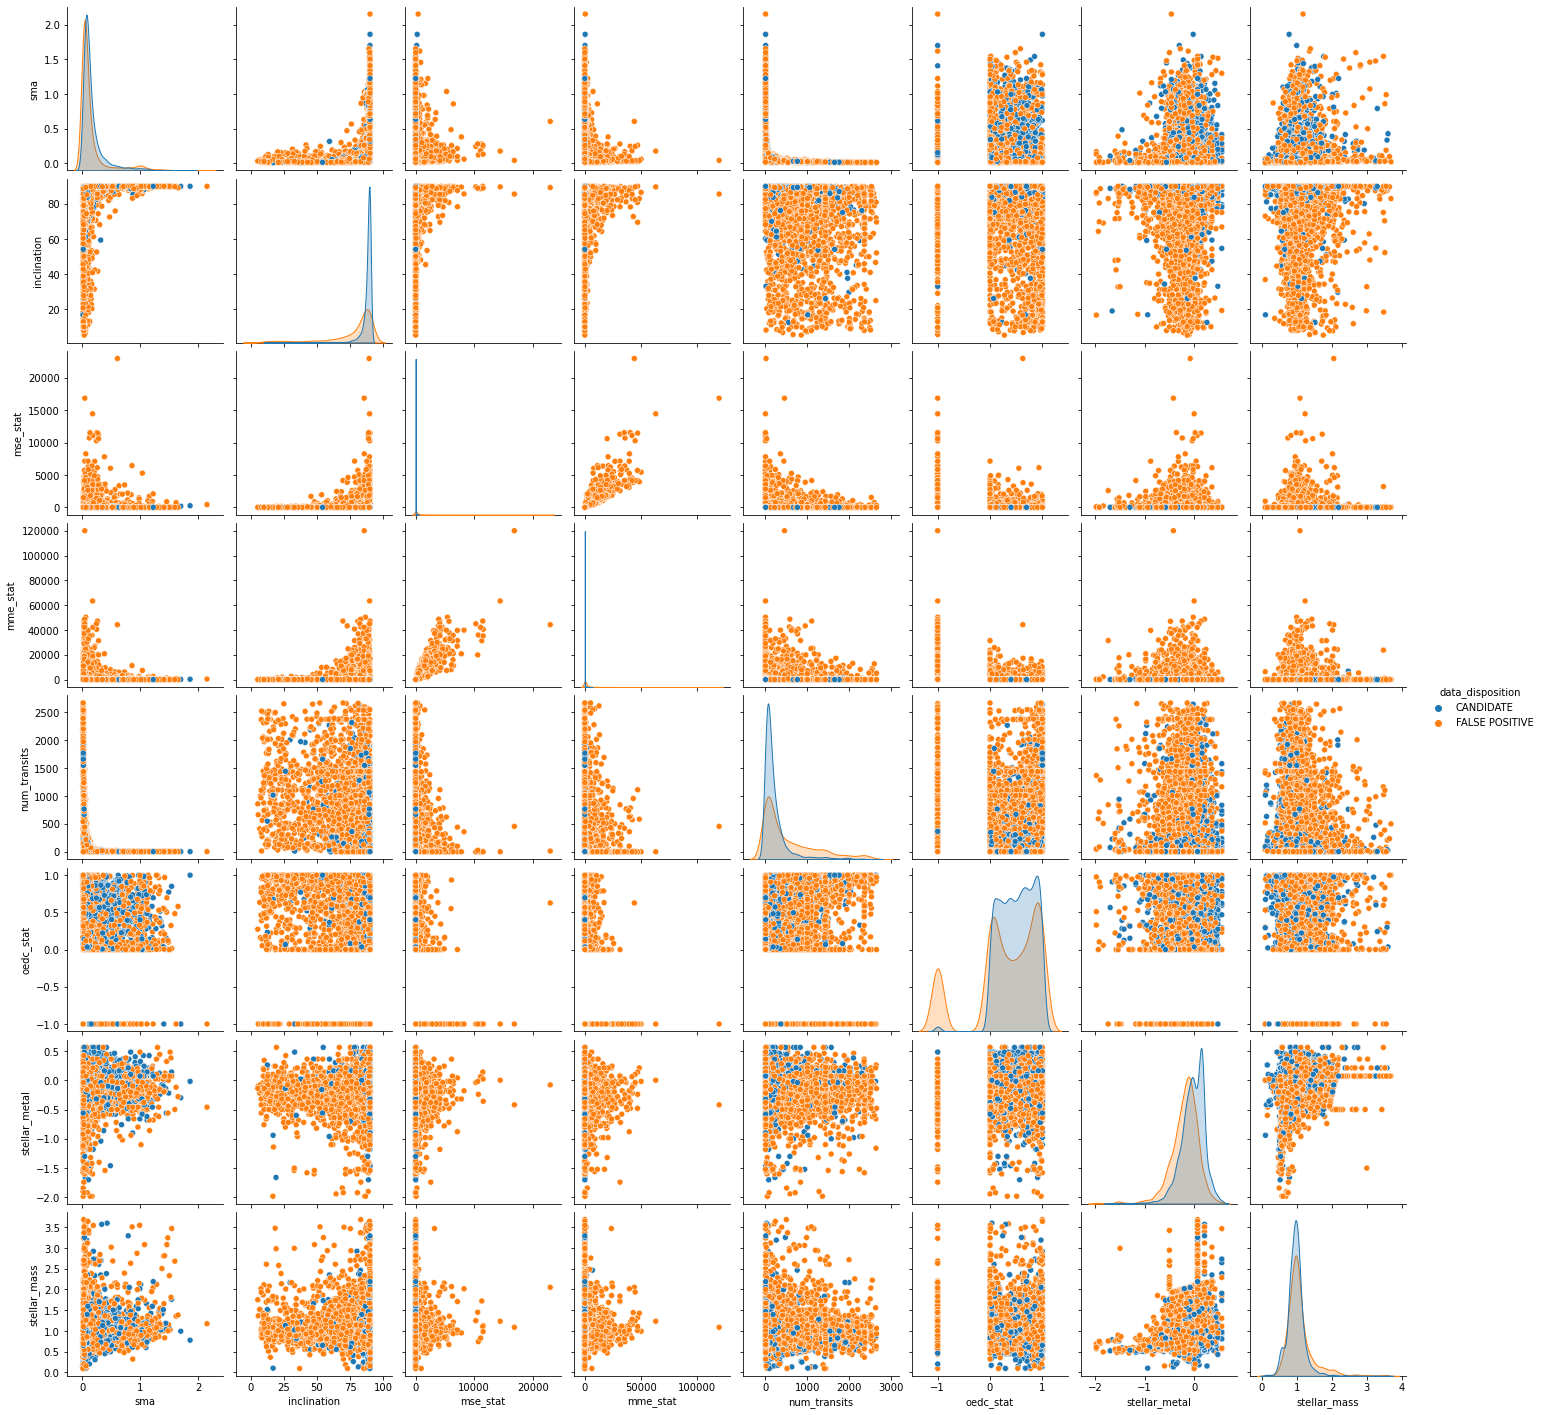

In [24]:
new_feats = ['data_disposition','sma', 'inclination', 'mse_stat','mme_stat', 'num_transits',
             'oedc_stat','stellar_metal', 'stellar_mass']
sns.pairplot(data=kd_mf_clean[new_feats],hue='data_disposition')

In [25]:
@interact
def widget(col=kd_mf_clean.columns):
    return kd_mf_clean[col].sort_values()

interactive(children=(Dropdown(description='col', options=('id', 'koi_name', 'kepler_name', 'planet_status', '…

<AxesSubplot:>

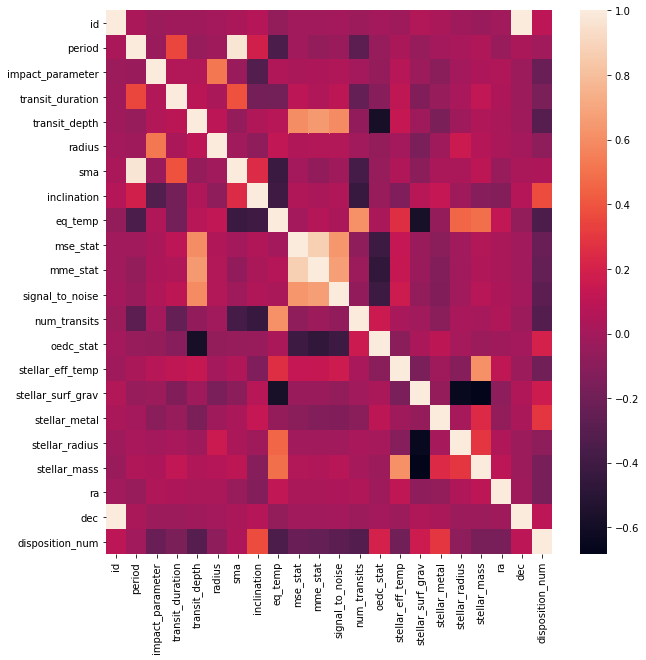

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(kd_mf_clean.corr())

In [28]:
@interact_manual
def plot_features(x=kd_mf_clean.columns, y=kd_mf_clean.columns,):
    if x!=y:
        sns.scatterplot(data=kd_mf_clean, x=x, y=y, hue='data_disposition')
    if x==y:
        sns.kdeplot(data=kd_mf_clean, x=x, hue='data_disposition')

interactive(children=(Dropdown(description='x', options=('id', 'koi_name', 'kepler_name', 'planet_status', 'da…

In [29]:
kd_mf_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7989 entries, 1 to 9564
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7989 non-null   int64  
 1   koi_name           7989 non-null   object 
 2   kepler_name        2348 non-null   object 
 3   planet_status      7989 non-null   object 
 4   data_disposition   7989 non-null   object 
 5   period             7989 non-null   float64
 6   impact_parameter   7989 non-null   float64
 7   transit_duration   7989 non-null   float64
 8   transit_depth      7989 non-null   float64
 9   radius             7989 non-null   float64
 10  sma                7989 non-null   float64
 11  inclination        7989 non-null   float64
 12  eq_temp            7989 non-null   float64
 13  mse_stat           7989 non-null   float64
 14  mme_stat           7989 non-null   float64
 15  signal_to_noise    7989 non-null   float64
 16  num_transits       7989 

Looks like there might be some good separation with these extra featuers, going to try putting them in